In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
def create_synthetic_dataset(num_samples, num_unique_cat1, num_unique_cat2):
    # Generating categorical features
    cat_feature1 = np.random.choice(range(num_unique_cat1), num_samples)
    cat_feature2 = np.random.choice(range(num_unique_cat2), num_samples)

    # Generating continuous feature with Gaussian distribution within range 1 to 4000
    mu, sigma = 2000, 1000  # mean and standard deviation
    continuous_feature = np.random.normal(mu, sigma, num_samples)
    continuous_feature = np.clip(continuous_feature, 1, 4000)  # Clip values to ensure they are within range

    # Creating DataFrame
    synthetic_data = pd.DataFrame({
        'Cat_Feature1': cat_feature1,
        'Cat_Feature2': cat_feature2,
        'Continuous_Feature': continuous_feature
    })

    return synthetic_data

In [3]:
synthetic_data = create_synthetic_dataset(200000, 160, 30)

# Displaying the first few rows of the synthetic dataset
print(synthetic_data.head())

   Cat_Feature1  Cat_Feature2  Continuous_Feature
0           117             7         1424.397924
1           122            26         1164.266023
2            95             9         1626.291574
3            80            24         1755.113105
4            73            20            1.000000


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
cat_features = ['Cat_Feature1', 'Cat_Feature2']
encoded_data = pd.get_dummies(synthetic_data, columns=cat_features)
X = encoded_data.drop('Continuous_Feature', axis=1)
y = encoded_data['Continuous_Feature']

In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
synthetic_data['Cat_Feature1'].dtype

dtype('int32')

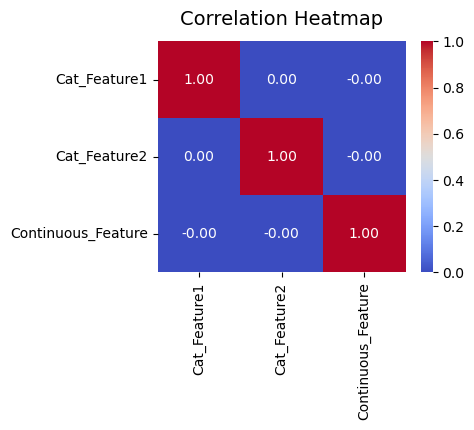

In [22]:
# Select the features of interest
selected_features = ["Cat_Feature1", "Cat_Feature2", "Continuous_Feature"]
correlation_matrix = synthetic_data[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(4, 3))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.show()

In [4]:
df = pd.read_csv('Dataset/housing.csv')

In [6]:
df

0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
count                                                 505                                              
unique                                                505                                              
top      0.02731   0.00   7.070  0  0.4690  6.4210  78...                                              
freq                                                    1

In [85]:
df = df[df['Spend_ExGST']>0]
df

AssetTypeID                  AssetType  YearsAfterInstallation  \
6               91         DX CONDENSING UNIT                    19.0   
7               91         DX CONDENSING UNIT                    19.0   
8               91         DX CONDENSING UNIT                    12.0   
9               91         DX CONDENSING UNIT                    19.0   
10              15          AIR HANDLING UNIT                    22.0   
...            ...                        ...                     ...   
10826          238  VARIABLE AIR VOLUME UNITS                    12.0   
10827          238  VARIABLE AIR VOLUME UNITS                    12.0   
10828          238  VARIABLE AIR VOLUME UNITS                    13.0   
10829          238  VARIABLE AIR VOLUME UNITS                    12.0   
10830          238  VARIABLE AIR VOLUME UNITS                    12.0   

                      WorkDescription  Spend_ExGST  
6                                222+       280.00  
7                                222+       280.00  
8                                222+       280.00  
9                                222+       280.00  
10     Can I please get someone to lo       940.75  
...                               ...          ...  
10826      BASEMENT CHEMIST WAREHOUSE       352.60  
10827   CHEMIST WAREHOUSE INVEST WARM       131.50  
10828  Chemist Warehouse VAV-B1-1 Con      1837.92  
10829      AHU-4B1 ISSUES 100% RETAIL       120.67  
10830   CHEMIST WAREHOUSE INVEST WARM       131.50  

[6394 rows x 5 columns]

In [86]:
df = df[df['YearsAfterInstallation']>0]

In [26]:
df.drop('WorkDescription',axis=1,inplace=True)

C:\Users\Ram kumar\AppData\Local\Temp\ipykernel_16464\1948764818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('WorkDescription',axis=1,inplace=True)


In [87]:
df

AssetTypeID                  AssetType  YearsAfterInstallation  \
6               91         DX CONDENSING UNIT                    19.0   
7               91         DX CONDENSING UNIT                    19.0   
8               91         DX CONDENSING UNIT                    12.0   
9               91         DX CONDENSING UNIT                    19.0   
10              15          AIR HANDLING UNIT                    22.0   
...            ...                        ...                     ...   
10826          238  VARIABLE AIR VOLUME UNITS                    12.0   
10827          238  VARIABLE AIR VOLUME UNITS                    12.0   
10828          238  VARIABLE AIR VOLUME UNITS                    13.0   
10829          238  VARIABLE AIR VOLUME UNITS                    12.0   
10830          238  VARIABLE AIR VOLUME UNITS                    12.0   

                      WorkDescription  Spend_ExGST  
6                                222+       280.00  
7                                222+       280.00  
8                                222+       280.00  
9                                222+       280.00  
10     Can I please get someone to lo       940.75  
...                               ...          ...  
10826      BASEMENT CHEMIST WAREHOUSE       352.60  
10827   CHEMIST WAREHOUSE INVEST WARM       131.50  
10828  Chemist Warehouse VAV-B1-1 Con      1837.92  
10829      AHU-4B1 ISSUES 100% RETAIL       120.67  
10830   CHEMIST WAREHOUSE INVEST WARM       131.50  

[6191 rows x 5 columns]

In [28]:
df.drop('AssetType', axis=1, inplace=True)
df

C:\Users\Ram kumar\AppData\Local\Temp\ipykernel_16464\2604325626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('AssetType', axis=1, inplace=True)


AssetTypeID  YearsAfterInstallation  Spend_ExGST
6               91                    19.0       280.00
7               91                    19.0       280.00
8               91                    12.0       280.00
9               91                    19.0       280.00
10              15                    22.0       940.75
...            ...                     ...          ...
10826          238                    12.0       352.60
10827          238                    12.0       131.50
10828          238                    13.0      1837.92
10829          238                    12.0       120.67
10830          238                    12.0       131.50

[6394 rows x 3 columns]

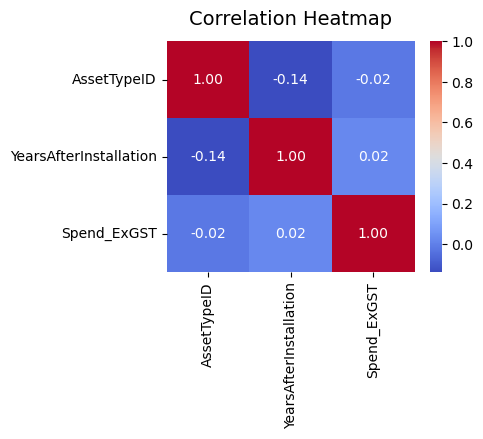

In [29]:
# Select the features of interest
selected_features = ["AssetTypeID", "YearsAfterInstallation", "Spend_ExGST"]
correlation_matrix = df[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(4, 3))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.show()

In [35]:
from sklearn.datasets import load_iris

In [36]:
df = load_iris()

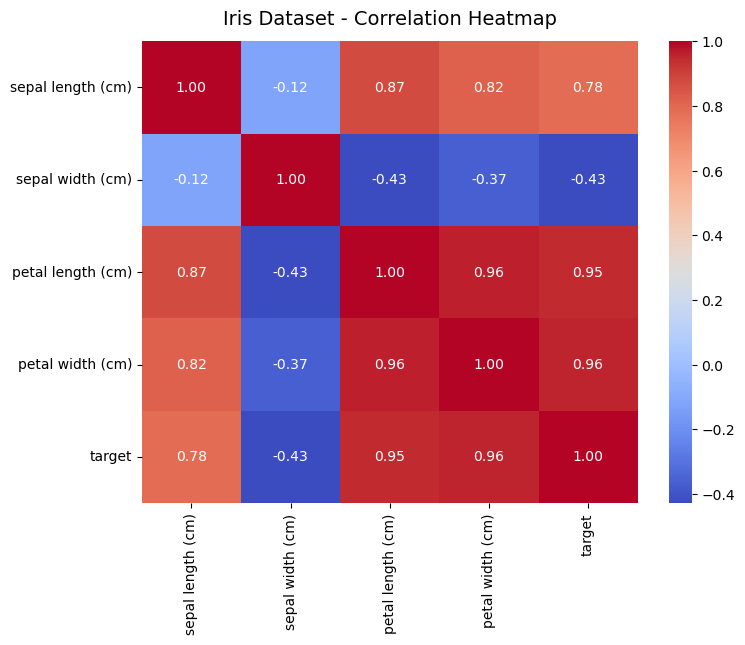

In [39]:
iris = load_iris()

# Create a DataFrame from the data
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Calculate correlation matrix
correlation_matrix = iris_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
heatmap.set_title('Iris Dataset - Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.show()

In [52]:
synthetic_data = create_synthetic_dataset(10000,20,10)
synthetic_data

Cat_Feature1  Cat_Feature2  Continuous_Feature
0                2             0         1049.031891
1               16             7         2470.158204
2                8             3         2945.945128
3                1             3         2129.432151
4               16             5            1.000000
...            ...           ...                 ...
9995             0             8         2655.322390
9996            14             0         3874.054760
9997            10             3         1284.973778
9998            12             2         3650.415344
9999             1             7         3756.798656

[10000 rows x 3 columns]

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [54]:
X = synthetic_data[['Cat_Feature1', 'Cat_Feature2']]
y = synthetic_data['Continuous_Feature']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=63)

In [76]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=63)
rf_regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=63)

In [77]:
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluating the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 892553.3948575578
Test MSE: 916841.8554809868


In [78]:
# Calculate RMSE for training set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

# Calculate RMSE for testing set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 944.7504405172606
Test RMSE: 957.5185927599457


C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [79]:
from mpl_toolkits.mplot3d import Axes3D

In [113]:
df = df[df['YearsAfterInstallation']>0]

In [114]:
df = df[df['YearsAfterInstallation']<50]

In [128]:
def pltfig(df,degree,azim=30):
    fig = plt.figure(figsize=(20, 40))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    scatter = ax.scatter3D(df['AssetTypeID'], df['YearsAfterInstallation'], df['Spend_ExGST'], c='b', marker='o')

    # Set labels and title
    ax.set_xlabel('AssetTypeID')
    ax.set_ylabel('YearsAfterInstallation')
    ax.set_zlabel('Spend_ExGST')
    ax.set_title('3D Scatter Plot')

    # Rotate the graph
    ax.view_init(elev=30, azim=degree)  # Change elev (elevation) and azim (azimuth) values to rotate

    plt.show()

In [120]:
df =df[df['Spend_ExGST']<10000]

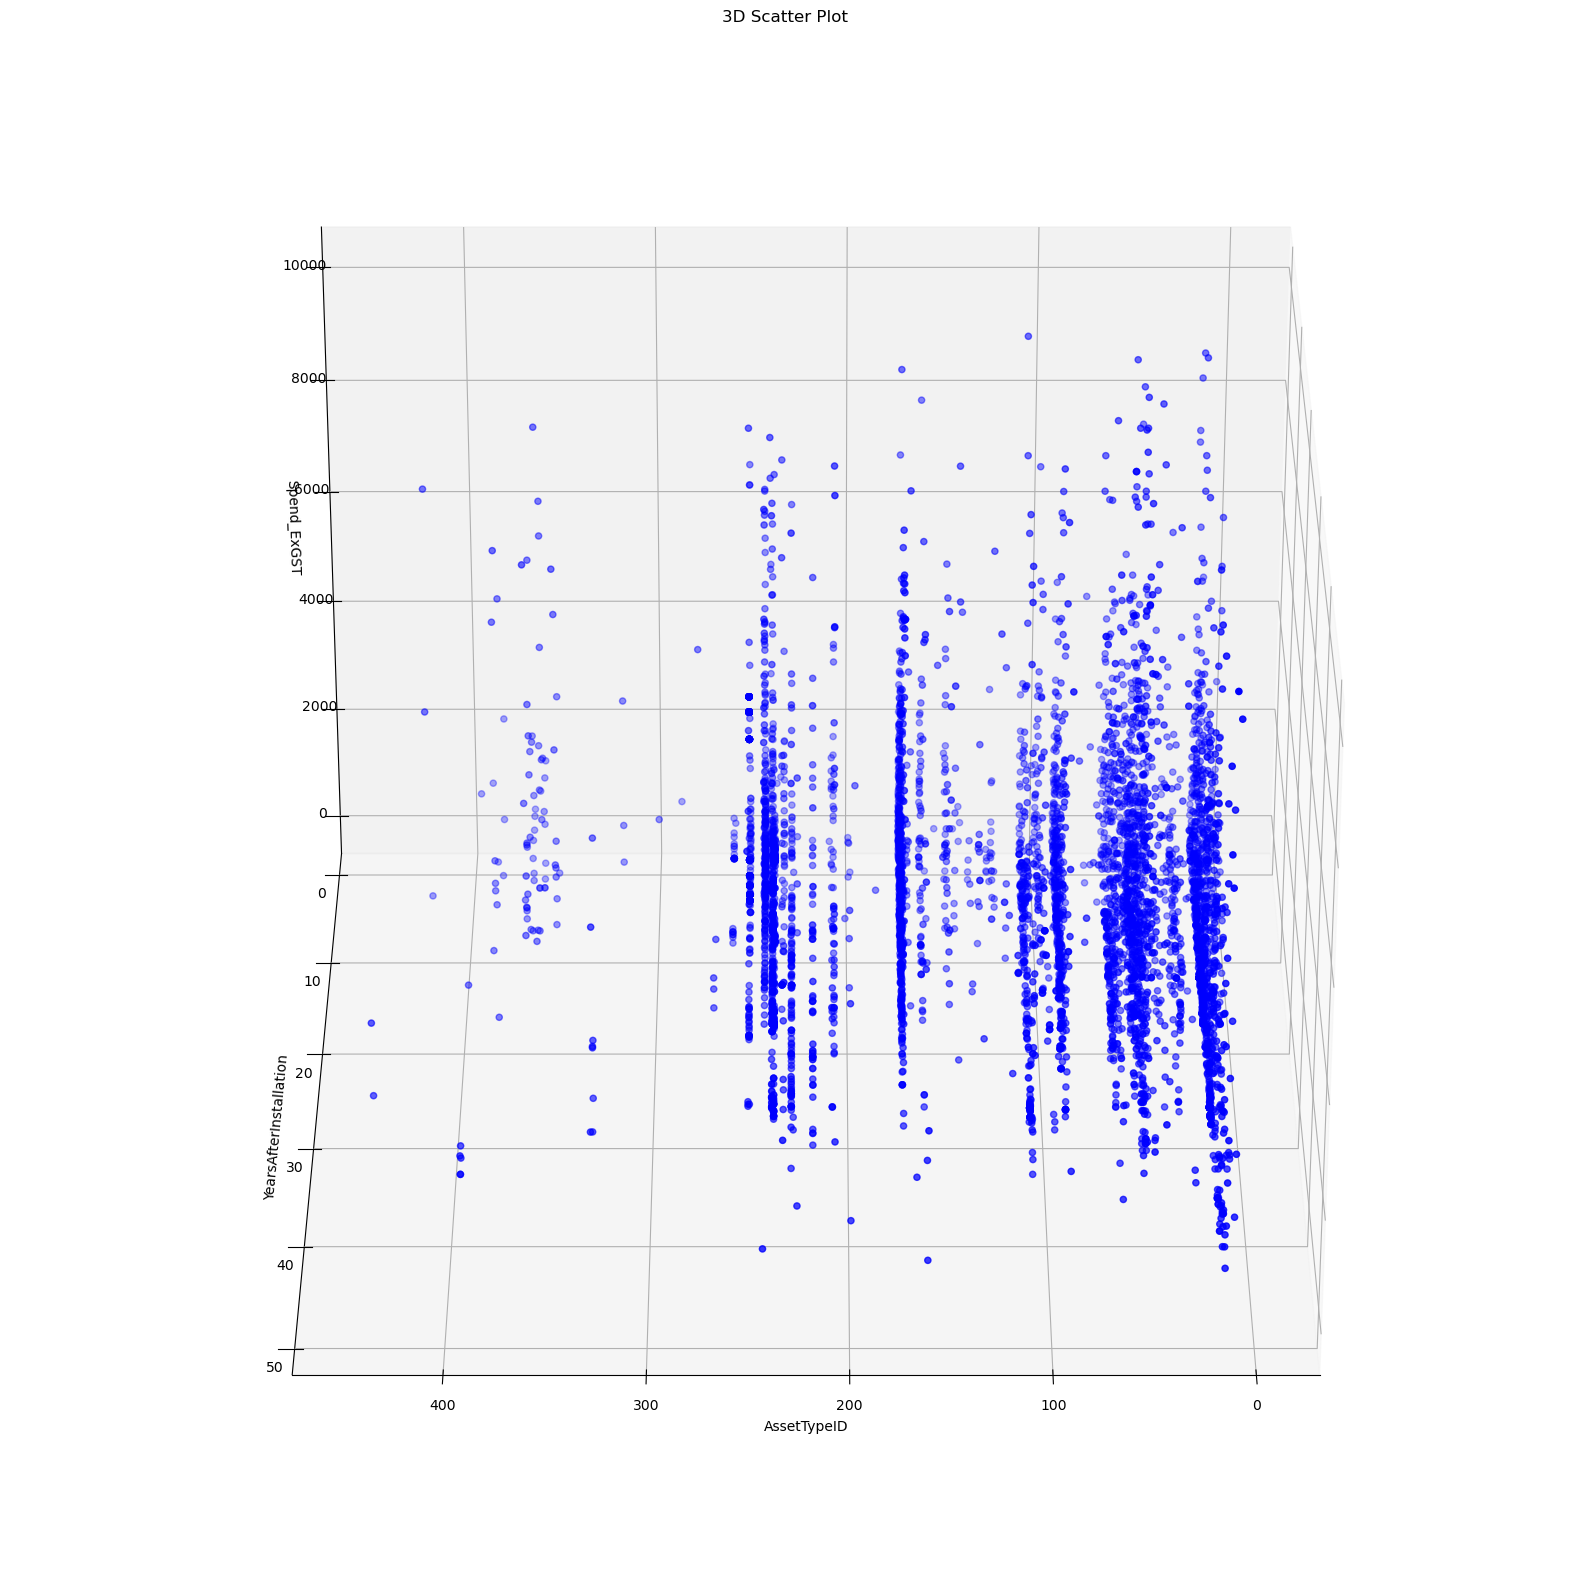

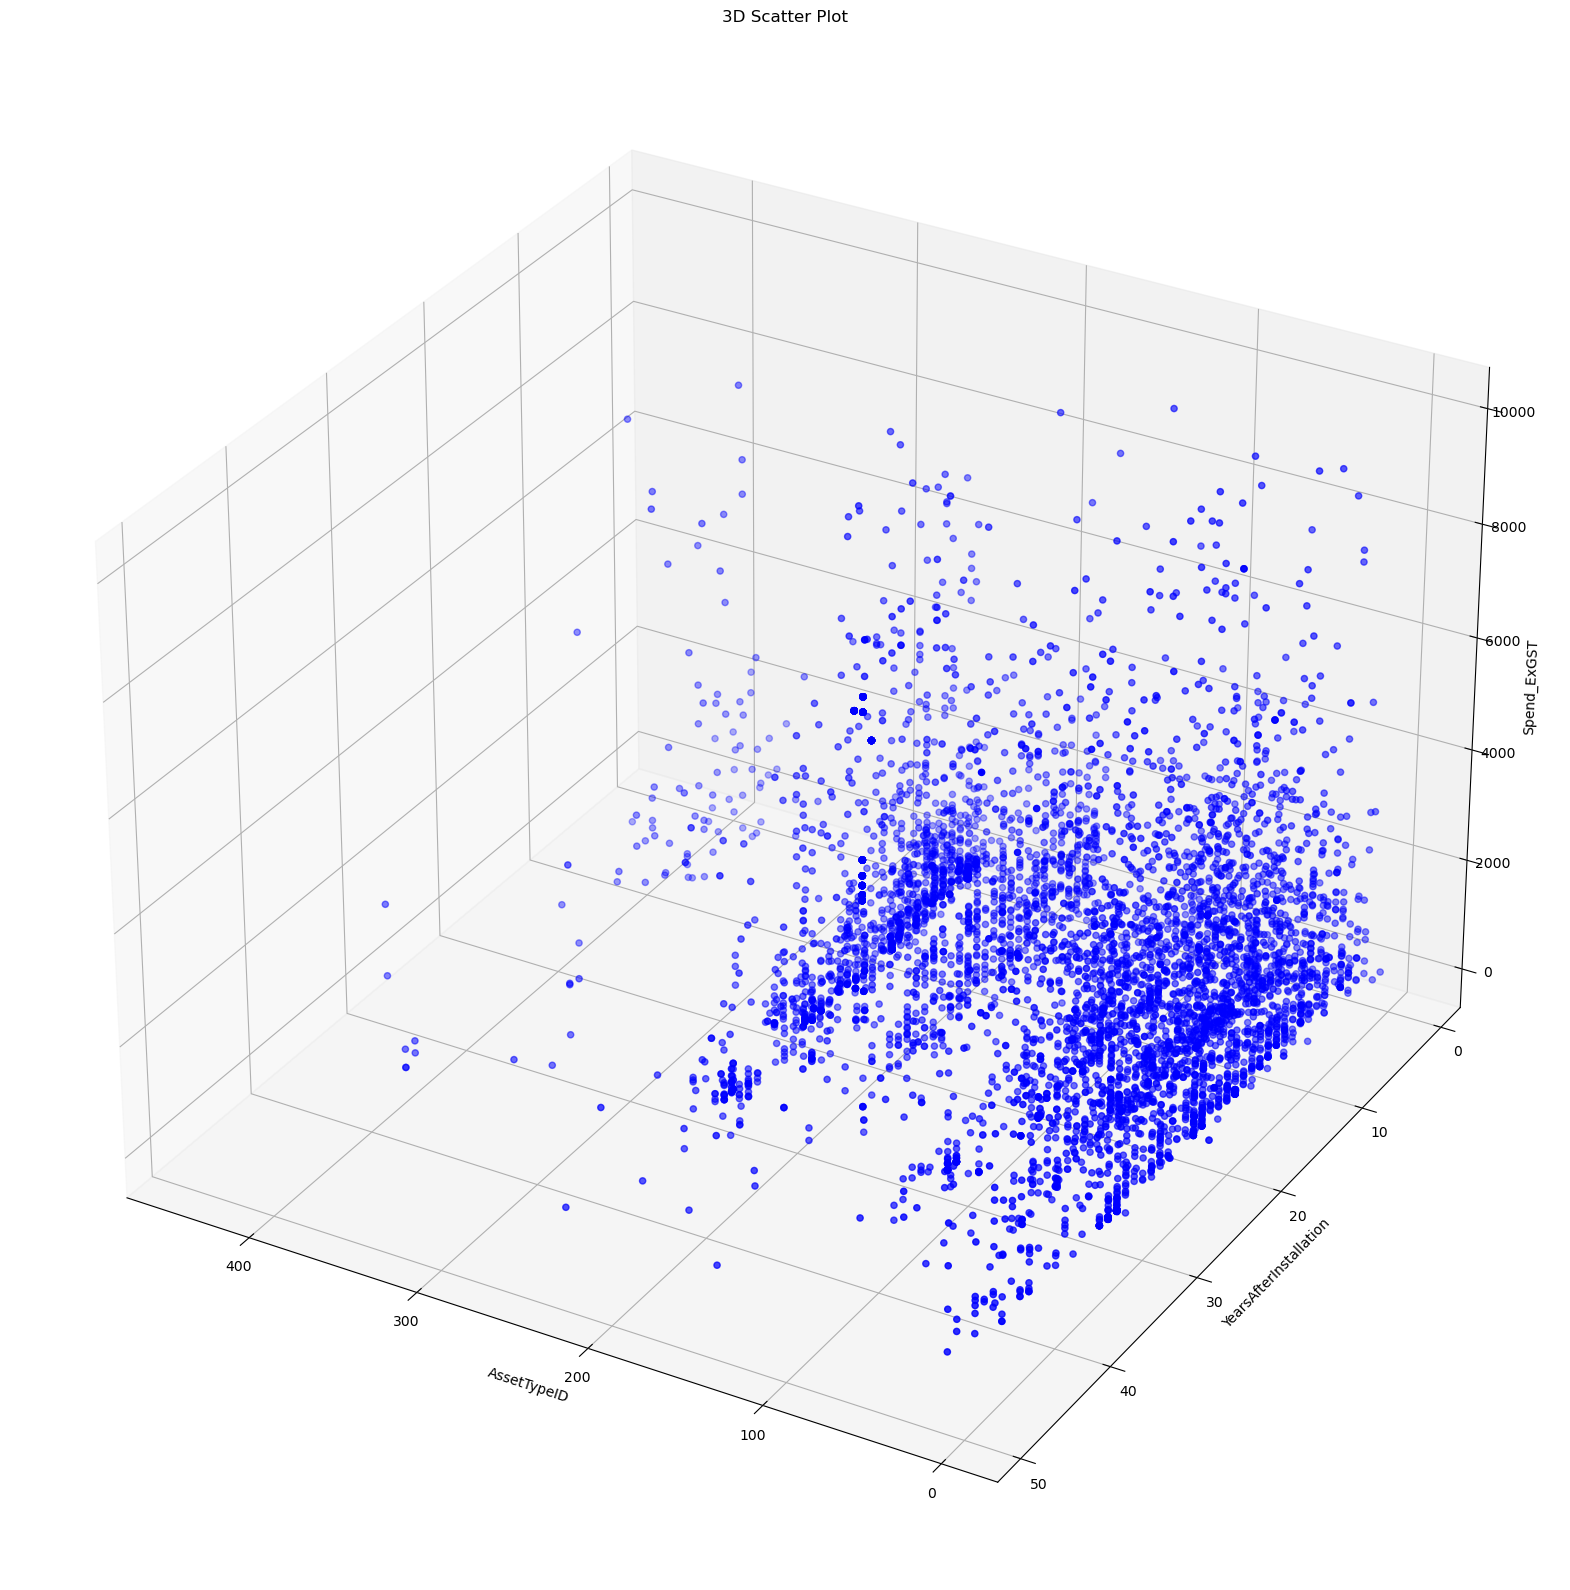

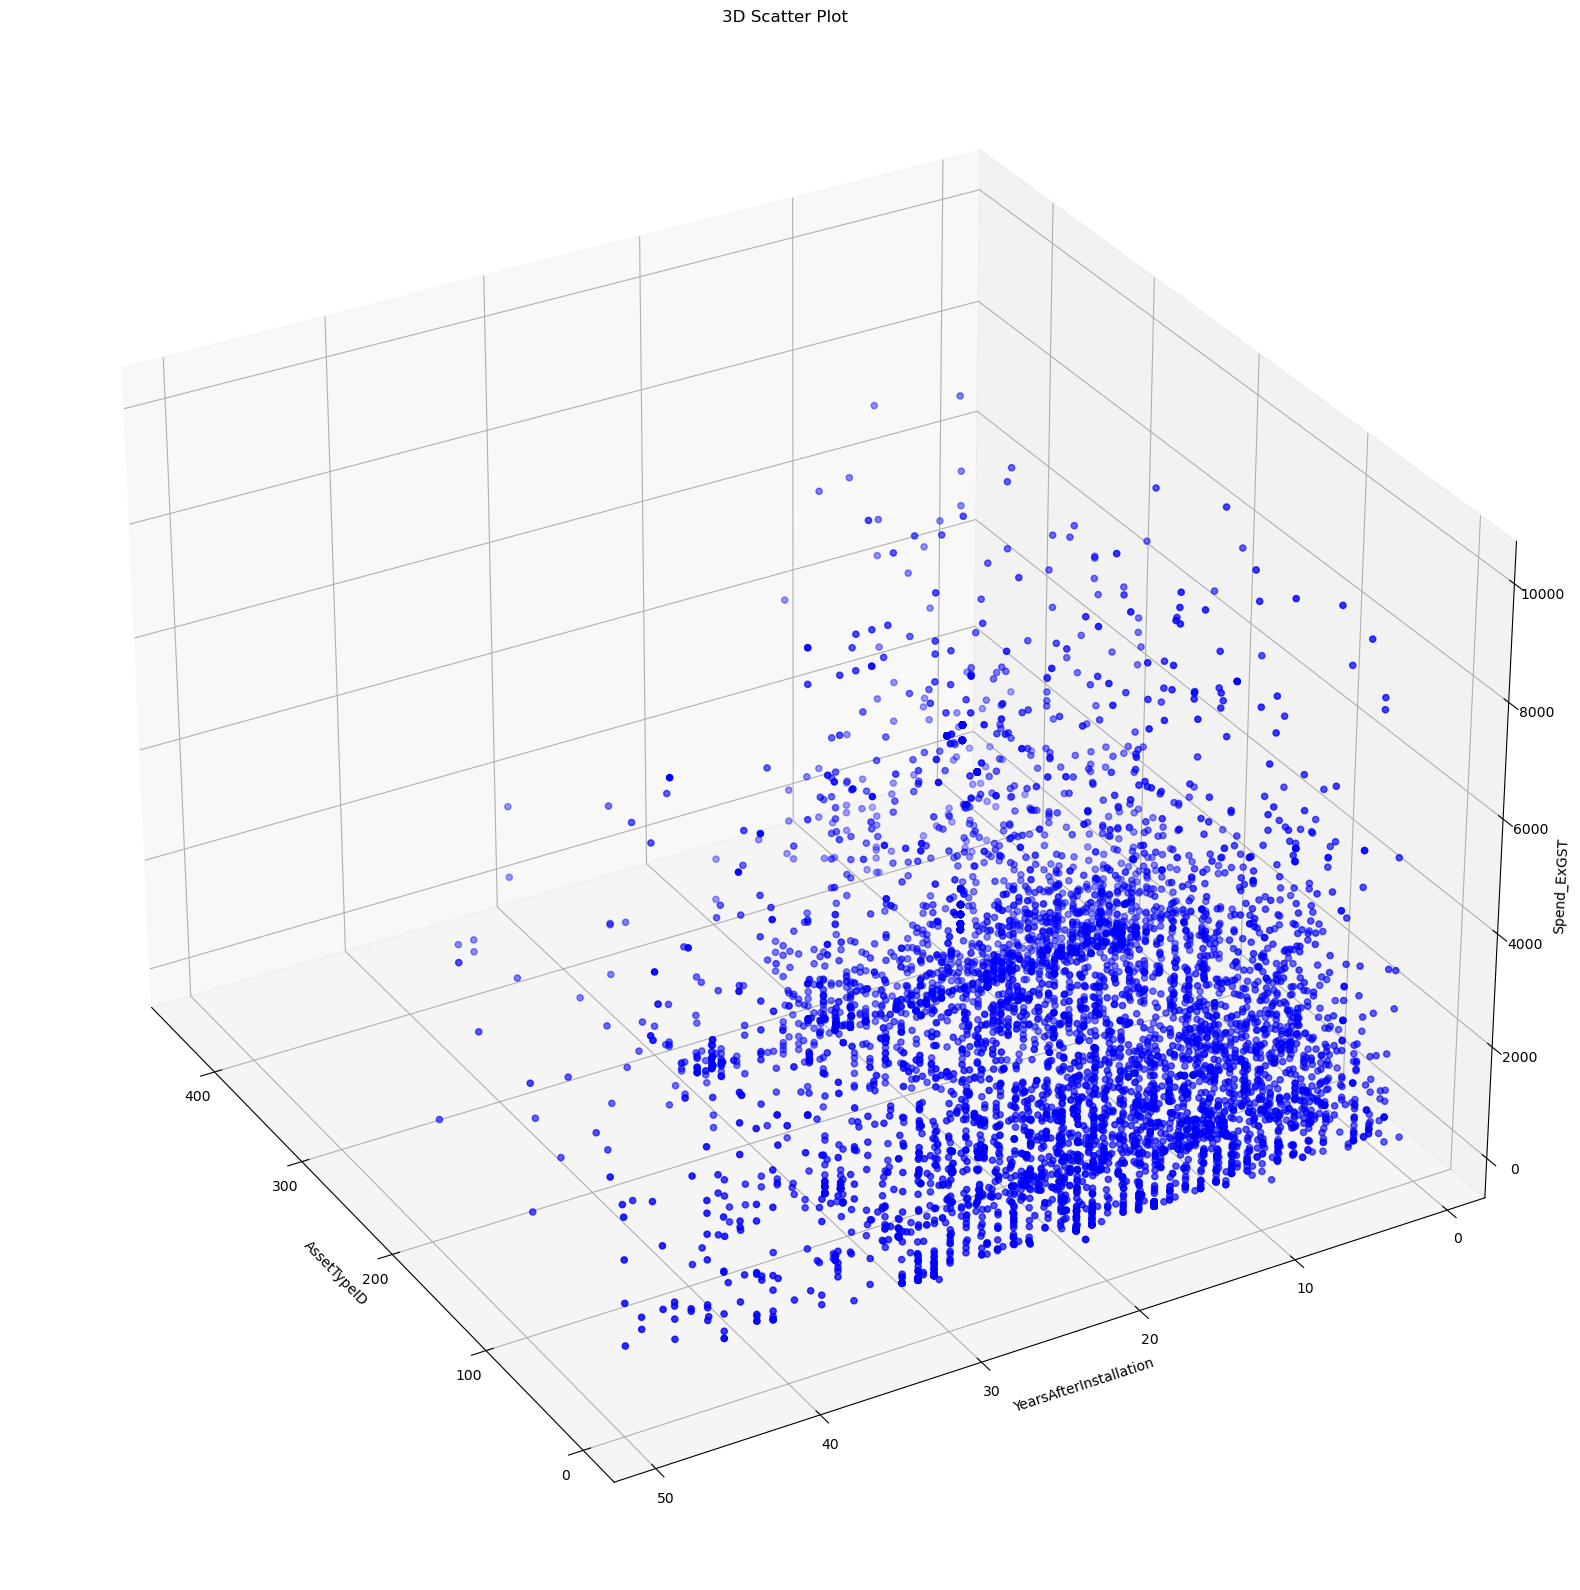

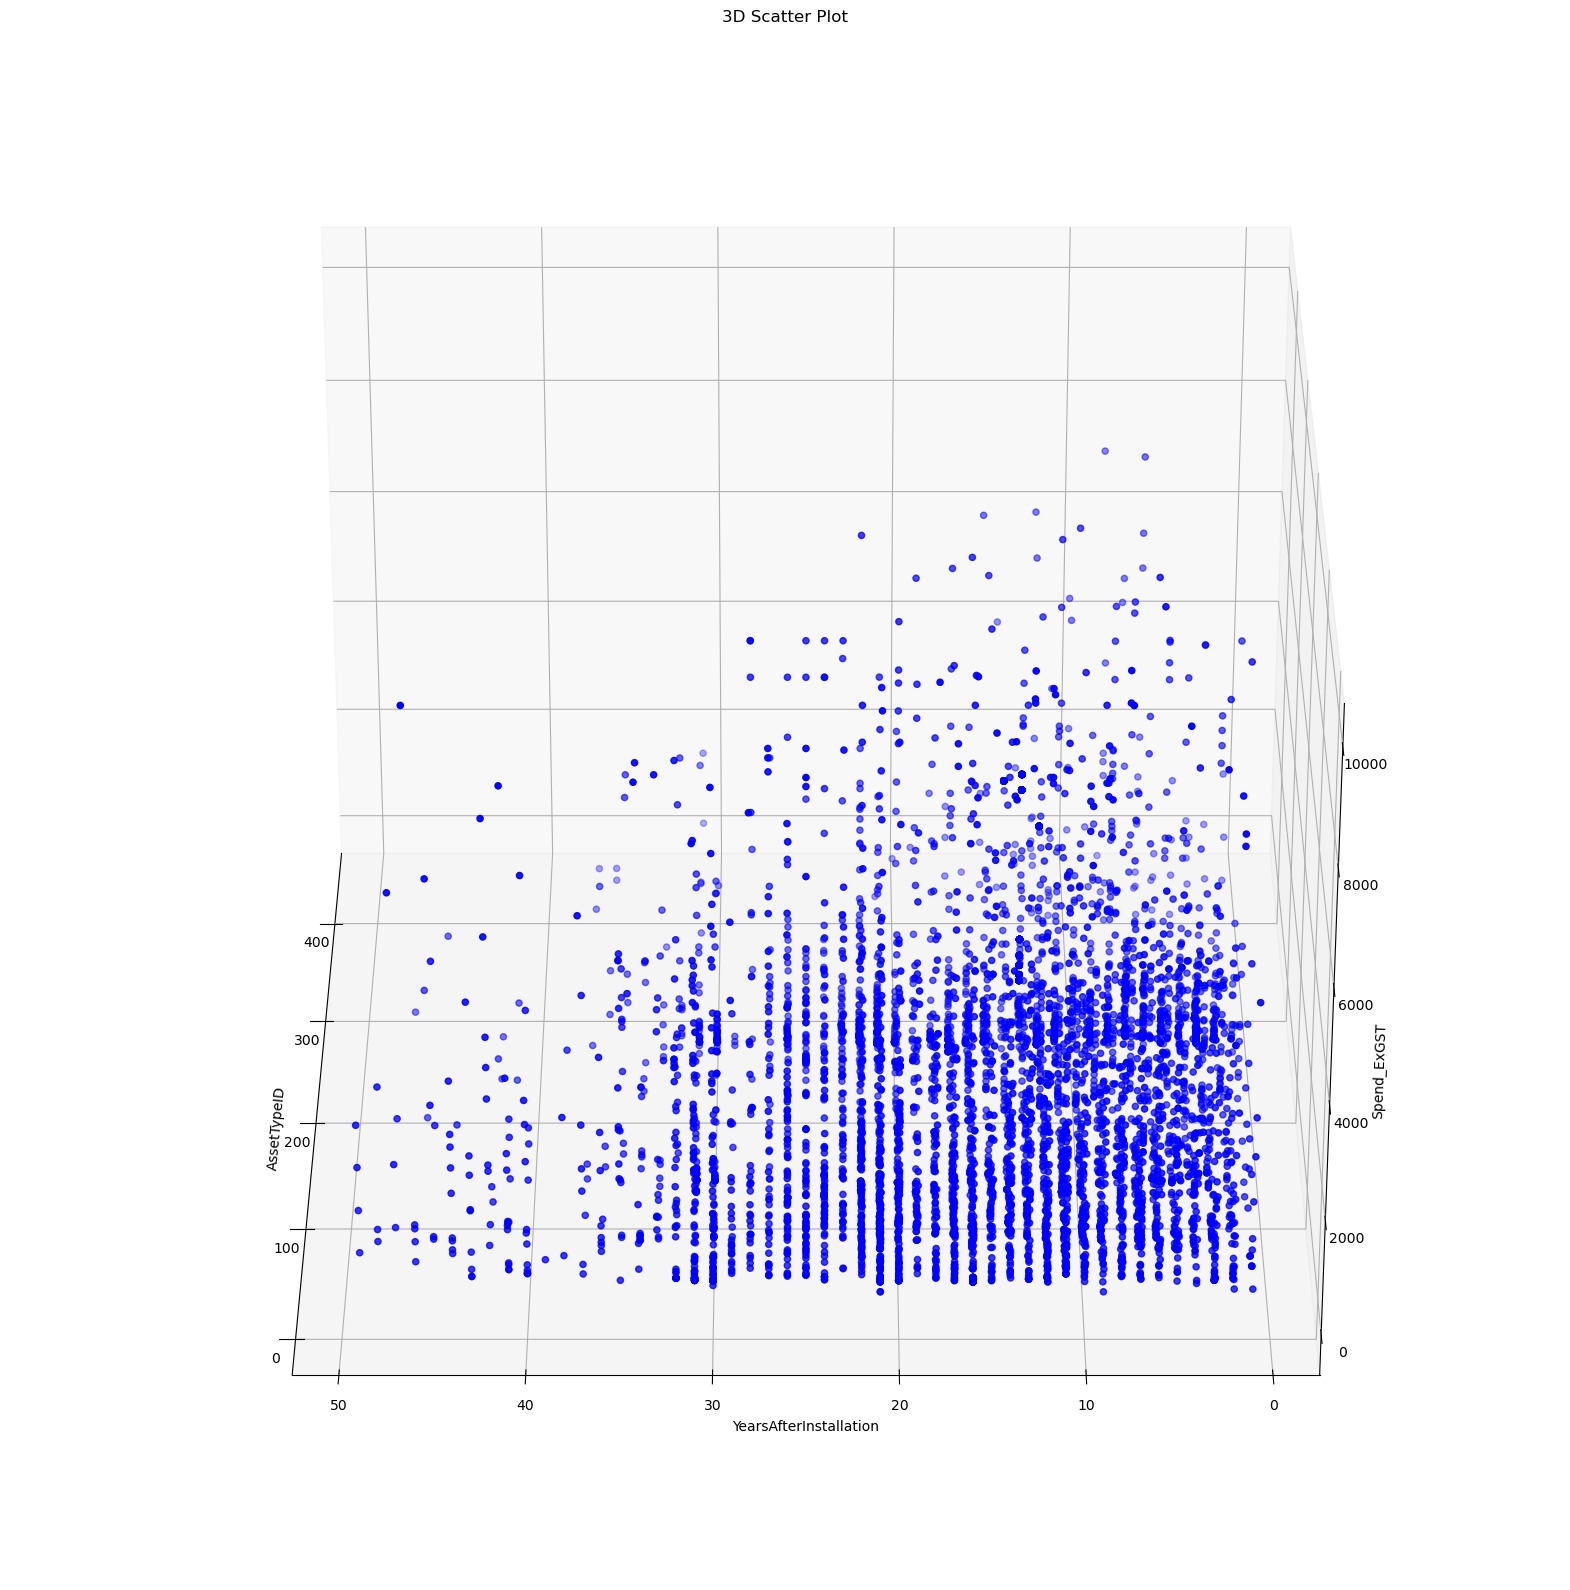

In [130]:
for i in [90,120,150,180]:
    if i==180:
        pltfig(df,i,az)
    else:
        pltfig(df,i)

In [131]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [132]:
import plotly.graph_objects as go

In [135]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['AssetTypeID'],
    y=df['YearsAfterInstallation'],
    z=df['Spend_ExGST'],
    mode='markers',
    marker=dict(
        size=1,
        color='blue',                # set color to an array/list of desired values
        opacity=0.8
    )
)])

# Set labels and title
fig.update_layout(scene=dict(
                    xaxis_title='AssetTypeID',
                    yaxis_title='YearsAfterInstallation',
                    zaxis_title='Spend_ExGST'),
                    title='3D Scatter Plot')

# Show the figure
fig.show()

In [141]:
df300 = pd.read_csv('Dataset/synthetic_300k.csv')

In [147]:
df300 = df300.iloc[:100000]

In [151]:
df300 = df300[df300['Years']<40]

In [155]:
fig = go.Figure(data=[go.Scatter3d(
    x=df300['AssetID'],
    y=df300['Years'],
    z=df300['Cost'],
    mode='markers',
    marker=dict(
        size=1,
        color='blue',                # set color to an array/list of desired values
        opacity=0.8
    )
)])

# Set labels and title
fig.update_layout(scene=dict(
                    xaxis_title='AssetTypeID',
                    yaxis_title='YearsAfterInstallation',
                    zaxis_title='Spend_ExGST'),
                    title='3D Scatter Plot')

# Show the figure
fig.show()

In [154]:
df300 = df300[df300['Cost']>0]
df300 = df300[df300['Cost']<12000]

In [157]:
X = df300[['AssetID', 'Years']]
y = df300['Cost']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=63)

In [159]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=63)
rf_regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=63)

In [160]:
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluating the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 2697145.7595084514
Test MSE: 2645853.600220822


In [161]:
# Calculate RMSE for training set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

# Calculate RMSE for testing set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 1642.298925137702
Test RMSE: 1626.6080044745943


C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [162]:
mean = y.mean()

In [163]:
mean

1483.1627389722362

In [164]:
median = y.median()
median

759.6847928328923